In [1]:
# Useful stuff
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob
import pickle

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor

In [31]:
def plot_Nice_PES(P_test,bins=90,sigma=0.99, title=False, size = 1):

    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(6*size,5*size))
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.5,cmap='jet', cbar=True,levels=levels,extent=extent)
    if title:
        plt.title(title, fontsize = 20*size, y=1.02)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=10*size, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=10*size)
    
def plot_Nice_PES2(P_test,bins=90,sigma=0.99, title=False, size = 1):

    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(6*size,5*size))
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.2,cmap='jet', cbar=True,levels=levels,extent=extent)
    plt.scatter(alldata[:,0][0], alldata[:,1][0],c='b', s=40*size,)
    if title:
        plt.title(title, fontsize = 20*size, y=1.02)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=10*size, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=10*size)

In [1]:
import matplotlib as mpl
import nglview as nv
import ipywidgets as widgets
import pytraj as pt
import warnings
import tqdm
warnings.filterwarnings("ignore")
#%pylab inline
%matplotlib inline

def interactive_FEL2(TICA_test, trajfiles, topfile, output_plot=True, n_frames=1,output_structure=False, size=1, bins=90, sigma=0.99, pc1=0, pc2=1):
    '''
        
        Plot the Free Energy Surface(FES) of the given data in a matplotlib pyqt. User can select a point in the FES. 
        
                
        If you experience some problem or you have any comment with this function --> https://github.com/miqueleg/compbiolab :3
        
        Parameters: ---------------------------------------------------------------------------------
        
        data: 3D ndarray (MD,frames,tic_dim). If not, the calculations will be wrong!!
        
        trajfiles: 1D array containing all trajectories strings containing files path and name(order in the list is important)
        
        topfile: string containing file path and name for the .pdb file that will be used as topology.
        
        output_plot: If true, a plot including the FES and selected pint will be displayed at the end.
            default=True
            
        output_structure: If True,the selected structure is also returned as pytraj structure.
            default=False
            
        size: Float/Integer that defines the size of the plots
            default=1
            
        
        Returns: -------------------------------------------------------------------------------------------
        
        - nglview of the structure selected
        
        - If output_structure=True, the selected structure is also returned as pytraj structure
        
        Only in in jupyter-notebook
          
    '''
    ##This imports are kind of necessary in order to plot the graphic in the Tk canvas(PQt5).
    ## At the end of the function, the matplotlib inline canvas has to be setted again in order to do not disturbe next plots
    %matplotlib tk

    ##Plot the Free energy surface as Nice_PES function
    mpl.style.use("seaborn-paper")
    fig, ax = plt.subplots(figsize=(6*size,5*size))
    alldata=np.vstack(TICA_test)
    min1=np.min(alldata[:,pc1])
    max1=np.max(alldata[:,pc1])
    min2=np.min(alldata[:,pc2])
    max2=np.max(alldata[:,pc2])
    print(all_data.shape)

    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,pc1], alldata[:,pc2], bins=bins)
    z += 0.1

    # compute free energies
    F = -np.log(z)

    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]

    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=8)
    ax.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    ax.contourf(data,alpha=0.5,cmap='jet', cbar=True,levels=levels,extent=extent)

    ##ginput will wait until a click is done into the plot and collect the coordinates into the x variable
    x = plt.ginput()

    #nodes are the prepared data corresponding of the points on the TICA scatter (tic0 and tic1 by default)
    nodes = np.array(list(zip(alldata[:,pc1],alldata[:,pc2])))
    node = np.array(x[0])
    #cdist finction computes the distance matrix between TICA nodes and node
    distances = np.array(cdist([node], nodes))
    #clicked frame is the position in the matrix distance in wich you can find the minimun value
    clicked_frames = np.argsort(distances)[0]
    clicked_frames = clicked_frames[:n_frames]
    MD_out = pt.Trajectory(top=topfile)
    
    for f in tqdm.tqdm(range(len(clicked_frames))):
        clicked_frame = clicked_frames[f]
        MD=pt.iterload(trajfiles, top=topfile)
        MD_out.append(MD[clicked_frame])

        #Frames is a list containing the len of all the MD's.
        #This forces the input TICA_test to have a 3D shape (MD,frames,tic_dim). If not, the calculations are wrong!!
        Frames = []
        for traj in TICA_test:
            Frames.append(len(traj))
        #In this loop is computed in wich MD and MD_frame you can find the clicked frame
        MD = 0
        Frame = clicked_frame
        for i in list(range(len(Frames))):
            sum_frames = sum([Frames[j] for j in list(range(len(Frames))) if j <= i])
            if clicked_frame <= sum_frames:
                MD = i
                Frame = clicked_frame - sum([Frames[j] for j in list(range(len(Frames))) if j < i])
                break
            else:
                continue
    #The selected_frame is displayed using pytraj and nglview
    MD=pt.iterload(trajfiles, top=topfile)
    view=nv.show_pytraj(MD)
    view.clear()
    view.add_cartoon(selection="protein")
    view.frame = int(clicked_frame)

    #returning to the matplotlib inline
    %matplotlib inline
    #plot the selected position with a scatter
    if output_plot:
        plt.figure(figsize=(6*size,5*size))
        plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
        plt.contourf(data,alpha=0.2,cmap='jet', cbar=True,levels=levels,extent=extent)
        plt.scatter(np.array(x)[:,0],np.array(x)[:,1], c ='b', s =50)
    if output_structure:
        return view, MD_out
    else:
        return view


In [4]:
directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/APO/'
trajfiles_APO=[fi.replace('\\', '/') for fi in glob.glob(directo + '*_super.dcd')]
topfile_APO='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_APO.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/ADP/'
trajfiles_ADP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_ADP='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_ADP.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/ATP/'
trajfiles_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_ATP='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_ATP.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/THM/'
trajfiles_THM=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_THM.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/THM_ATP/'
trajfiles_THM_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM_ATP='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_THM_ATP.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/THM_ADP/'
trajfiles_THM_ADP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM_ADP='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_THM_ADP.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/GCV/'
trajfiles_GCV=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_GCV.pdb'

directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/GCV_ATP/'
trajfiles_GCV_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV_ATP='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_GCV_ATP.pdb'


directo='/home/janet/Desktop/DYN_HSVTK/TRAJS/GCV_ADP/'
trajfiles_GCV_ADP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV_ADP='/home/janet/Desktop/DYN_HSVTK/TOPS/MD_1E2K_GCV_ADP.pdb'

In [5]:
trajfiles = []
trajfiles.append(trajfiles_APO)
trajfiles.append(trajfiles_ADP)
trajfiles.append(trajfiles_ATP)
trajfiles.append(trajfiles_THM)
trajfiles.append(trajfiles_THM_ATP)
trajfiles.append(trajfiles_THM_ADP)
trajfiles.append(trajfiles_GCV)
trajfiles.append(trajfiles_GCV_ATP)
trajfiles.append(trajfiles_GCV_ADP)
topfiles = []
topfiles.append(topfile_APO)
topfiles.append(topfile_ADP)
topfiles.append(topfile_ATP)
topfiles.append(topfile_THM)
topfiles.append(topfile_THM_ATP)
topfiles.append(topfile_THM_ADP)
topfiles.append(topfile_GCV)
topfiles.append(topfile_GCV_ATP)
topfiles.append(topfile_GCV_ADP)

In [6]:
pca_Y = pickle.load(open("PCA/pca_Y.p", "rb"))
pca_APO = pickle.load(open("PCA/pca_APO.p", "rb"))
pca_ADP = pickle.load(open("PCA/pca_ADP.p", "rb"))
pca_ATP = pickle.load(open("PCA/pca_ATP.p", "rb"))
pca_THM = pickle.load(open("PCA/pca_THM.p", "rb"))
pca_THM_ATP = pickle.load(open("PCA/pca_THM_ATP.p", "rb"))
pca_THM_ADP = pickle.load(open("PCA/pca_THM_ADP.p", "rb"))
pca_GCV = pickle.load(open("PCA/pca_GCV.p", "rb"))
pca_GCV_ATP = pickle.load(open("PCA/pca_GCV_ATP.p", "rb"))
pca_GCV_ADP = pickle.load(open("PCA/pca_GCV_ADP.p", "rb"))

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

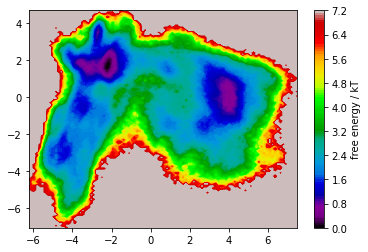

In [7]:
all_data=np.vstack(pca_Y)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

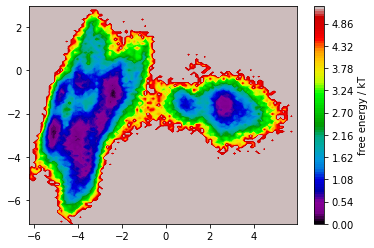

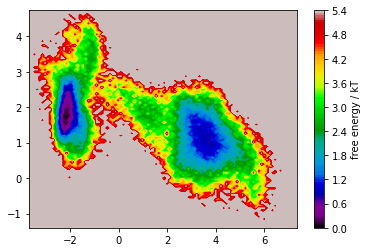

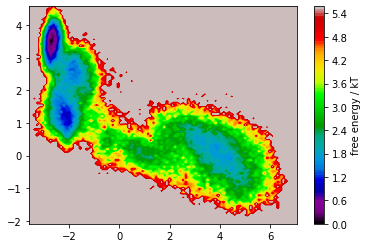

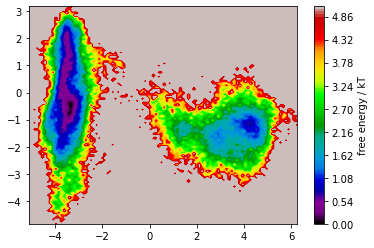

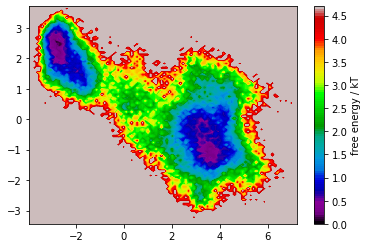

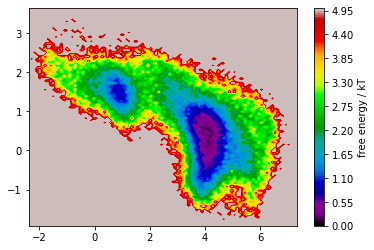

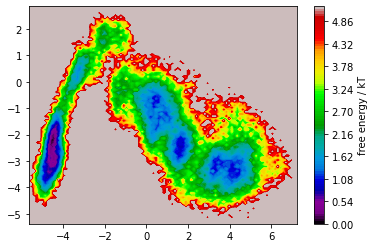

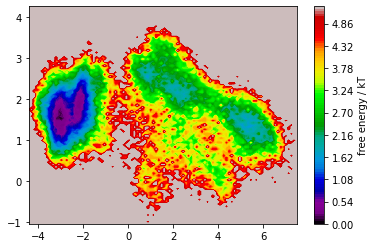

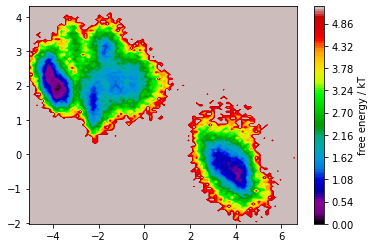

In [8]:
all_data=np.vstack(pca_APO)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_ADP)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_ATP)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_THM)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_THM_ATP)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_THM_ADP)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_GCV)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_GCV_ATP)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)

all_data=np.vstack(pca_GCV_ADP)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1], avoid_zero_count=1)


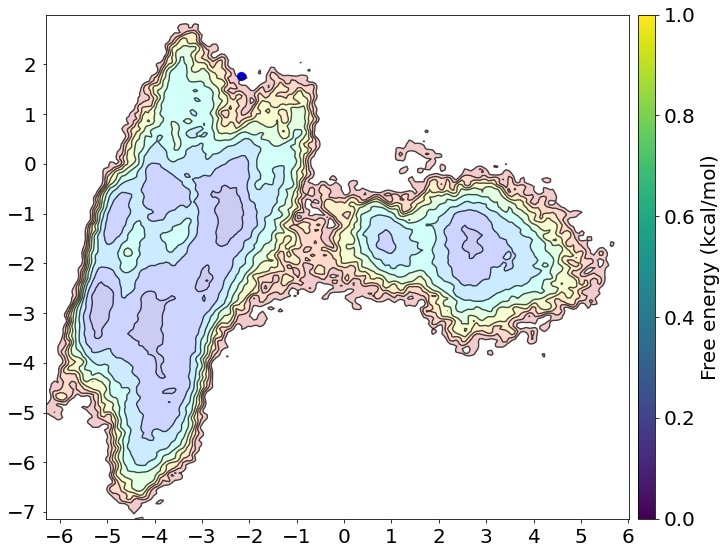

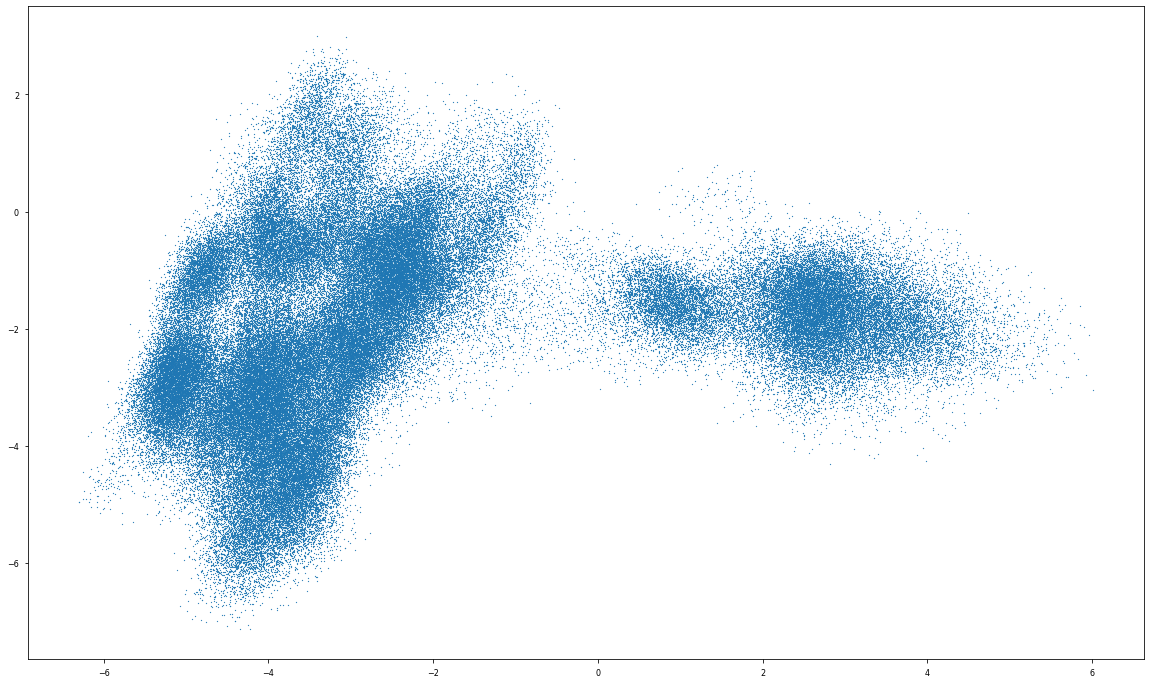

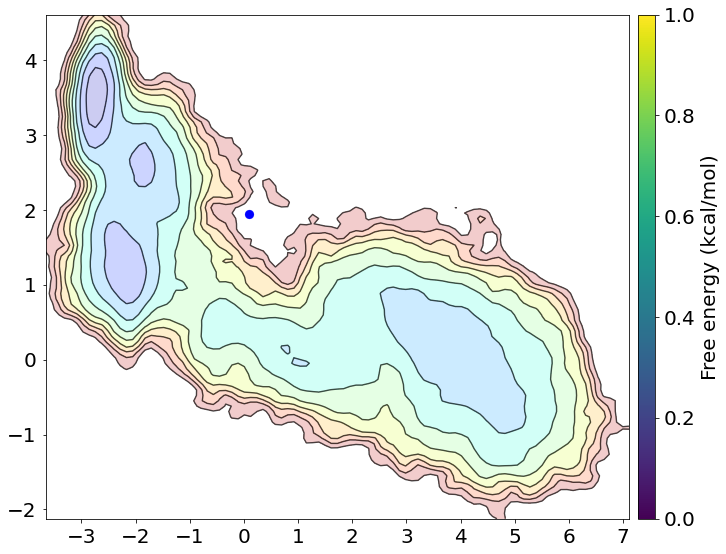

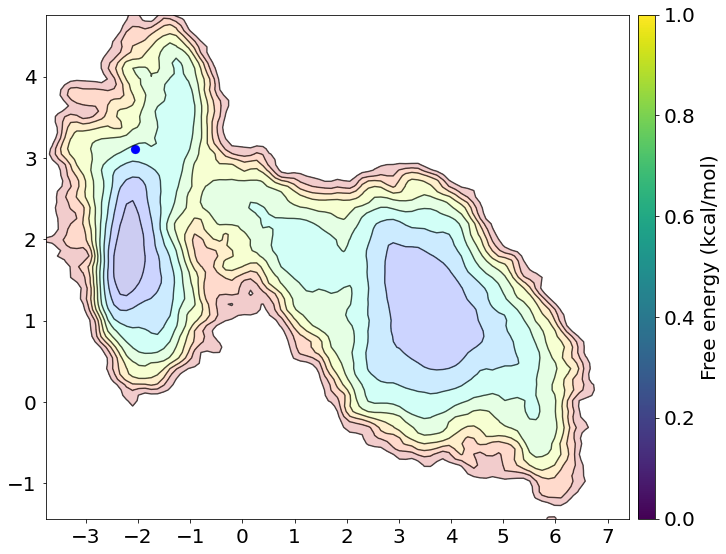

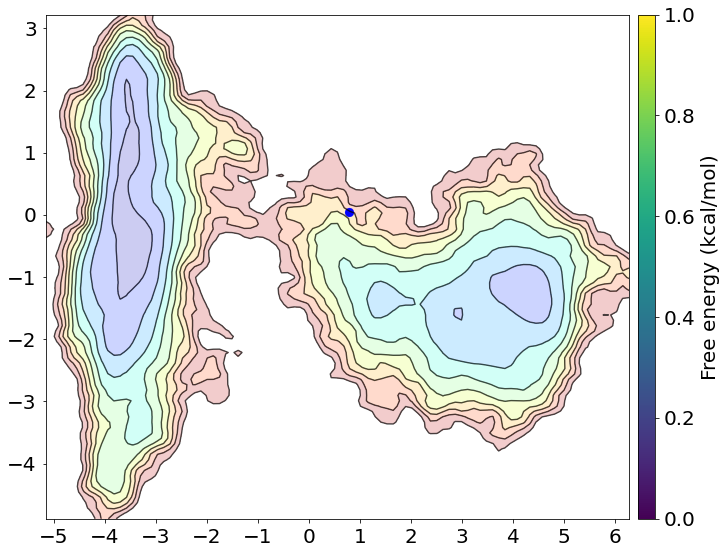

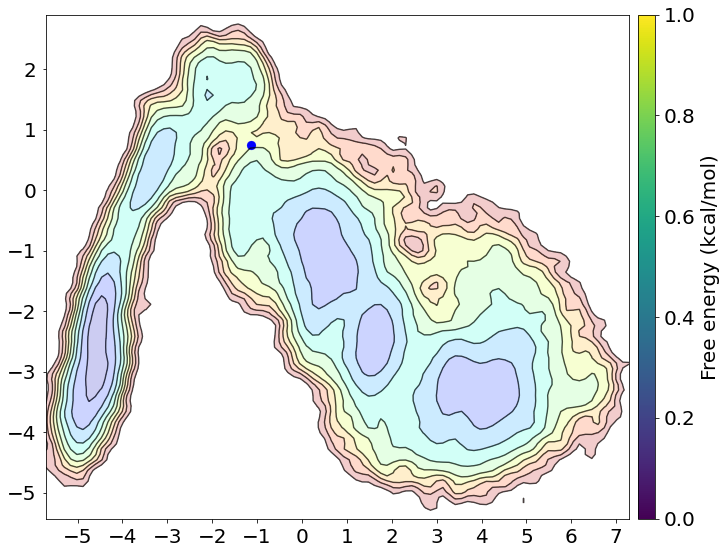

In [53]:
plot_Nice_PES2(pca_APO, bins=200, size=2)
plt.show()
plt.figure(figsize=(20,12))
plt.scatter(np.vstack(pca_APO)[:,0], np.vstack(pca_APO)[:,1], s=1)
plot_Nice_PES2(pca_ATP, bins=95, size=2)
plot_Nice_PES2(pca_ADP, bins=95, size=2)
plot_Nice_PES2(pca_THM, bins=95, size=2)
plot_Nice_PES2(pca_GCV, bins=95, size=2)

(75000, 133)


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/janet/miniconda3/envs/AT21/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/home/janet/miniconda3/envs/AT21/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/janet/miniconda3/envs/AT21/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 476, in delayed_destroy
    self.window.destroy()
  File "/home/janet/miniconda3/envs/AT21/lib/python3.8/tkinter/__init__.py", line 2311, in destroy
    for c in list(self.children.values()): c.destroy()
  File "/home/janet/miniconda3/envs/AT21/lib/python3.8/tkinter/__init__.py", line 2583, in destroy
    Misc.destroy(self)
  File "/home/janet/miniconda3/envs/AT21/lib/python3.8/tkinter/__init__.py", line 640, in destroy
    self.tk.deletecommand(name)
_tkinter.TclError: can't delete Tcl command
100%|██████████| 1/1 [00:00<00:00, 25.93it/s]


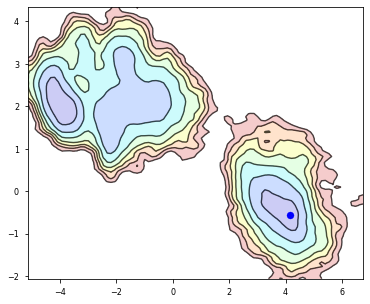

In [21]:
i = 7
view, frame = interactive_FEL2(pca_GCV_ADP, trajfiles=trajfiles[i], topfile=topfiles[i], pc1=0, pc2=1,output_structure=True)

In [22]:
selected = pt.Trajectory(top=topfiles[i])
selected.append(frame)
selected.save('../PCA_STRUCTURES/GCV_ADP_5.pdb', overwrite=True)